# Solutions to week 5 exercises in Introduction to Financial Engineering

This Jupyter Notebook shows one way on how to do the exercises for week 5 in Python.
We start by importing the needed libraries. 

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

In [2]:
# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

### 1. Returns, portfolios and diversification
Collect 10 years of weekly data for Coca Cola, McDonalds and Microsoft for the period January 1, 1991 to January 1, 2001.
The tickers are "COKE", "MCD" and "MSFT" for Coca Cola, McDonalds and Microsoft, respectively.


In [3]:
start = datetime.datetime(1991,1,2)
end = datetime.datetime(2001,1,1)

ticks = ['COKE', 'MCD', 'MSFT']
stocks = yf.download(ticks, start=start, end=end, interval='1wk')
print('Columns in stock dataframe:: {}'.format(list(stocks)))
print("\nThe dimenstion of the dataframe is:",stocks.shape)
print("NaN values:",stocks.isnull().values.any())

[*********************100%***********************]  3 of 3 completed
Columns in stock dataframe:: [('Adj Close', 'COKE'), ('Adj Close', 'MCD'), ('Adj Close', 'MSFT'), ('Close', 'COKE'), ('Close', 'MCD'), ('Close', 'MSFT'), ('High', 'COKE'), ('High', 'MCD'), ('High', 'MSFT'), ('Low', 'COKE'), ('Low', 'MCD'), ('Low', 'MSFT'), ('Open', 'COKE'), ('Open', 'MCD'), ('Open', 'MSFT'), ('Volume', 'COKE'), ('Volume', 'MCD'), ('Volume', 'MSFT')]

The dimenstion of the dataframe is: (534, 18)
NaN values: True


In [4]:
# Dropping the rows with NaN values. They are there because of some bug with the yf.download
stocks = stocks.dropna()
print("\nThe dimenstion of the dataframe is:",stocks.shape)
print("NaN values:",stocks.isnull().values.any())


The dimenstion of the dataframe is: (522, 18)
NaN values: False


Have a look at the data and see that it looks OK.

In [5]:
stocks

Adj Close                          Close                       \
                 COKE        MCD       MSFT     COKE       MCD       MSFT   
Date                                                                        
1991-01-01   9.208526   3.749779   0.657732  16.7500   6.84375   1.039931   
1991-01-08   9.208526   3.664165   0.674202  16.7500   6.68750   1.065972   
1991-01-15   9.964451   3.938121   0.786204  18.1250   7.18750   1.243056   
1991-01-22  10.720373   3.801145   0.810360  19.5000   6.93750   1.281250   
1991-01-29  10.995258   4.006612   0.870753  20.0000   7.31250   1.376736   
...               ...        ...        ...      ...       ...        ...   
2000-11-28  26.381729  18.515764  17.847700  35.5625  31.43750  28.218750   
2000-12-05  28.143604  17.632313  18.361589  37.9375  29.93750  29.031250   
2000-12-12  30.786419  19.031116  15.120136  41.5000  32.31250  23.906250   
2000-12-19  28.792715  19.251976  14.685322  38.8125  32.68750  23.218750   
2000-12-26  28.097244  20.025003  13.716833  37.8750  34.00000  21.687500   

               High                           Low                       \
               COKE       MCD       MSFT     COKE       MCD       MSFT   
Date                                                                     
1991-01-01  19.0000   7.28125   1.079861  16.7500   6.81250   1.038194   
1991-01-08  17.2500   7.09375   1.097222  16.5000   6.53125   1.013889   
1991-01-15  18.2500   7.37500   1.250000  16.5000   6.68750   1.065972   
1991-01-22  19.7500   7.28125   1.305556  17.7500   6.90625   1.213542   
1991-01-29  20.7500   7.34375   1.402778  19.2500   6.59375   1.250000   
...             ...       ...        ...      ...       ...        ...   
2000-11-28  35.8750  33.25000  34.875000  33.8125  30.43750  27.593750   
2000-12-05  39.9375  31.25000  30.250000  35.0000  28.75000  26.125000   
2000-12-12  42.2500  32.56250  30.250000  36.0000  30.37500  23.500000   
2000-12-19  45.0000  33.18750  24.000000  38.8125  31.37500  20.156250   
2000-12-26  40.5625  34.50000  24.281250  36.2500  32.06250  21.500000   

               Open                         Volume                           
               COKE       MCD       MSFT      COKE         MCD         MSFT  
Date                                                                         
1991-01-01  18.5000   7.28125   1.041667   63500.0   9567200.0  236973600.0  
1991-01-08  16.5000   6.84375   1.038194  233300.0  11749600.0  436622400.0  
1991-01-15  16.5000   6.71875   1.065972   77300.0  20363200.0  644428800.0  
1991-01-22  17.7500   7.21875   1.244792   85600.0  21385600.0  494762400.0  
1991-01-29  19.7500   6.71875   1.281250  110200.0  46176400.0  613101600.0  
...             ...       ...        ...       ...         ...          ...  
2000-11-28  34.0000  31.62500  34.687500   43600.0  22520400.0  613144400.0  
2000-12-05  35.8750  31.25000  29.593750   42400.0  29583200.0  554119600.0  
2000-12-12  37.8125  30.50000  28.906250   62000.0  33630300.0  456755000.0  
2000-12-19  40.0000  32.50000  23.718750   38400.0  17402900.0  542034400.0  
2000-12-26  39.8125  32.62500  23.437500   45400.0  14108300.0  313542200.0  

[522 rows x 18 columns]

**1.a Calculate the weekly returns for each of the stocks**

In [6]:
# Calculate the return of each of the stocks and do not include the first row of the output
returns = stocks["Adj Close"].pct_change().iloc[1:,0:]
returns

,COKE,MCD,MSFT
Date,,,
1991-01-08,0.000000,-0.022832,0.025041
1991-01-15,0.082090,0.074766,0.166125
1991-01-22,0.075862,-0.034782,0.030725
1991-01-29,0.025641,0.054054,0.074526
1991-02-05,0.200000,0.025641,0.051703
...,...,...,...
2000-11-28,0.009760,-0.015656,-0.201591
2000-12-05,0.066784,-0.047713,0.028793
2000-12-12,0.093905,0.079332,-0.176534


**1.b Calculate the annualised mean and covariance matrix for the returns of the stocks**

First calculate the mean and the covariance matrix for the weekly returns and then annualize. Refer to week 1 - 2

In [7]:
# Function to calculate average returns using geometric mean
def calc_mean(returns):
    return (np.prod(1 + returns))**(1/len(returns)) - 1
weeklymean = calc_mean(returns)
weeklycov = returns.cov()

annual_mean = (1+weeklymean)**52-1

annual_cov = weeklycov*52
print("The annual mean is:\n", annual_mean)
print("\nThe annual cov matrix:\n", annual_cov)

The annual mean is:
 COKE    0.117775
MCD     0.181999
MSFT    0.354152
dtype: float64

The annual cov matrix:
           COKE       MCD      MSFT
COKE  0.073210  0.002747  0.001492
MCD   0.002747  0.068466  0.020255
MSFT  0.001492  0.020255  0.135214


**1.c Consider all portfolios weights (0, 0, 1), (0, 0.1, 0.9), (0.1, 0.1, 0.8),. . . , (0.9, 0.1, 0), (1, 0, 0).
For each of the portfolios calculate the annualised mean and annualised standard deviation. Plot mean against standard deviation for all these portfolio in one single plot.**

In [8]:
# Initialize
portfolios = []
port_mean = []
port_var = []
port_std = []

ws1 = np.round(np.arange(1,-0.1,-0.1),1)

for i, w1 in enumerate(ws1):
    ws2 = np.round(np.arange(1-w1,-0.1,-0.1),1)
    for j, w2 in enumerate(ws2):
        w3 = np.round(1 - w1 - w2,1)
        # Saving the weights
        current_port = [w1,w2,w3]
        portfolios.append(current_port)
        
        # Calculating annual mean of the portfolio
        port_mean.append(current_port @ annual_mean)
        
        # Calculating the annual variance
        port_var.append(current_port @ annual_cov @ current_port)
        
# Calculating the annual standard deviation
port_std = np.sqrt(port_var)

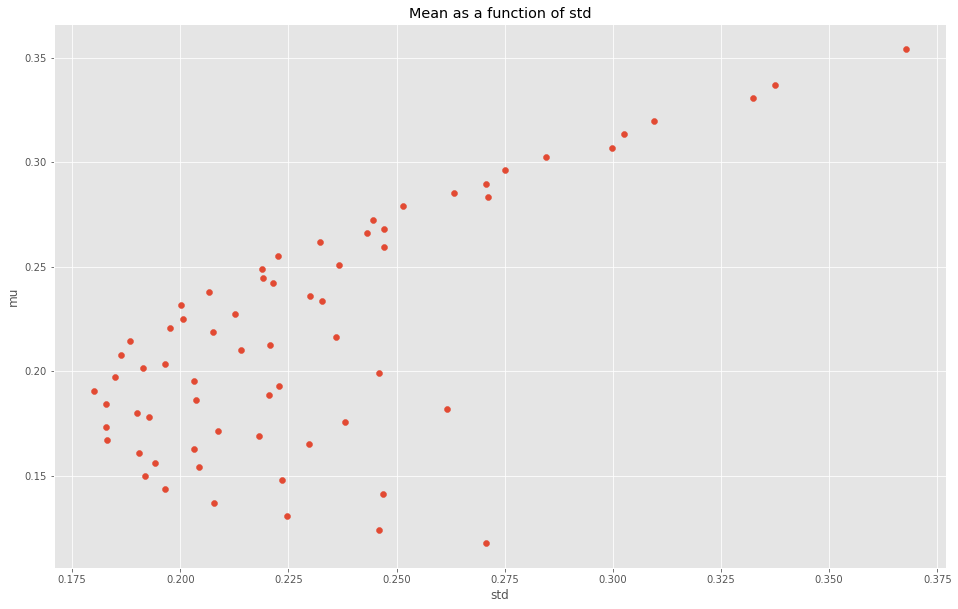

In [9]:
plt.scatter(port_std, port_mean)
plt.title("Mean as a function of std")
plt.ylabel('mu')
plt.xlabel('std')
plt.show()

**1.d Which of the portfolios has the maximal mean? Could you have answered this question
without doing c?**

In [10]:
# Find the maximum mean among the calculated values
max_mean_idx = np.argmax(port_mean)
max_mean = port_mean[max_mean_idx]

print("The maximum mean is:", max_mean,"\n")
print("The weights of the max mean portfolio are (COKE, MCD, MSFT):",portfolios[max_mean_idx])

The maximum mean is: 0.354151593974126 

The weights of the max mean portfolio are (COKE, MCD, MSFT): [0.0, 0.0, 1.0]


The mean of a portfolio can never be higher than the highest of the means of the individual stocks. In this case it is MSFT with an annual return of mean of 0.35.

**1.e Which of the portfolios has the lowest standard deviation? Could you have answered this question without doing c?**

In [11]:
# Find the minimum variance/standard deviation among the calculated values
min_var_idx = np.argmin(port_var)
min_var = port_var[min_var_idx]

print("The minimum variance is:", min_var, "\n")
print("The weights of the min var portfolio are (COKE, MCD, MSFT):",portfolios[min_var_idx])

The minimum variance is: 0.03243538092443662 

The weights of the min var portfolio are (COKE, MCD, MSFT): [0.4, 0.4, 0.2]


The portfolio weights can be expressed as
$\mathbf{w} = \frac{1}{c}\mathbf{\Sigma}^{-1} \mathbf{1}$
where c is one of the elements of the A matrix (see slides from powerpoint)

In [12]:
from numpy.linalg import inv

In [13]:
mu_1 = np.ones([3,2])
mu_1[:,0] = annual_mean

A = np.transpose(mu_1) @ inv(annual_cov) @ mu_1

c = A[1,1]

# The weights for the global minimum variance portfolio can then be computed
w_gmv = 1/c * inv(annual_cov) @ np.ones([3,1])

print("w_gmv = ", np.transpose(w_gmv))

w_gmv =  [[0.42263936 0.40351956 0.17384109]]


**1.f Which of the portfolios has the highest ratio of mean to standard deviation? Why is
this portfolio interesting?**

In [14]:
# Computing the ratio of mean to standard devation.
port_ratio = port_mean/port_std

# Finding maximum ratio
max_ratio_idx = np.argmax(port_ratio)
max_ratio = port_ratio[max_ratio_idx]

print("The maximum mean/std ratio is:", max_ratio, "\n")
print("The weights of the max mean/std ratio portfolio are:", portfolios[max_ratio_idx])

The maximum mean/std ratio is: 1.1565360372831501 

The weights of the max mean/std ratio portfolio are: [0.3, 0.3, 0.4]


Lets plot the portfolios onto the previous plot

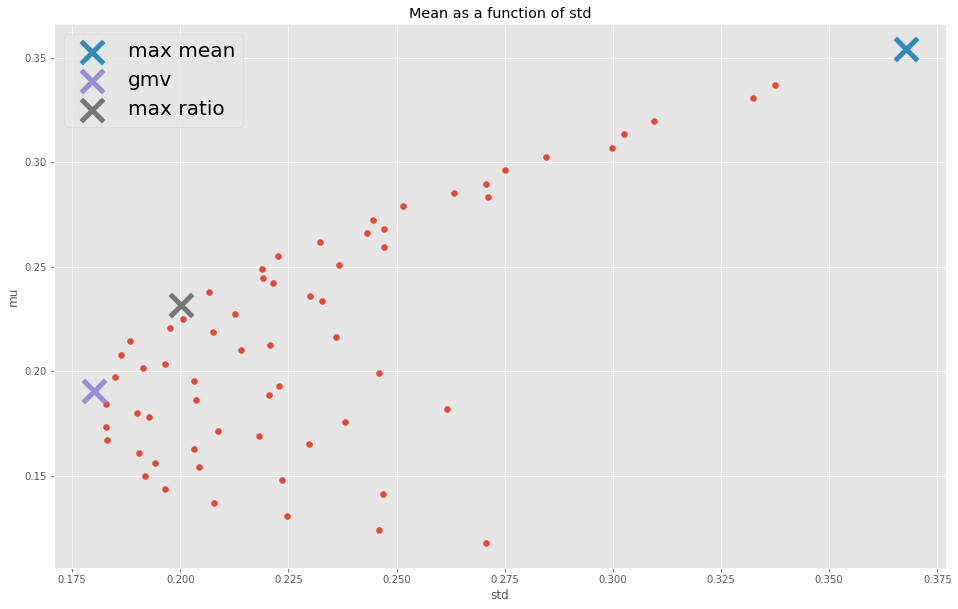

In [15]:
plt.scatter(port_std, port_mean, label="_nolegend_")
plt.scatter(port_std[max_mean_idx], port_mean[max_mean_idx],s =500, marker = "x", linewidths =5)
plt.scatter(port_std[min_var_idx], port_mean[min_var_idx],s =500, marker = "x", linewidths =5)
plt.scatter(port_std[max_ratio_idx], port_mean[max_ratio_idx],s =500, marker = "x", linewidths =5)
plt.title("Mean as a function of std")
plt.ylabel('mu')
plt.xlabel('std')
plt.legend(list(("max mean", "gmv", "max ratio")), prop={'size': 20})
plt.show()

### 2. Portfolios, diversification, efficient frontier
Assume that

* Asset 1 has an annual expected return of 10% and the standard deviation is 10%

* Asset 2 has an annual expected return of 20% and the standard deviation is 20%

**2.a Find the Efficient Frontier (combinations of ($\mu; \sigma)$) when short selling is allowed and with no riskless lending/borrowing for each of the following correlation coefficient between the terunds of assets 1 and 2
* $\rho = 0$
* $\rho = 0.5$
* $\rho = -0.5$

Recall how the correlation coefficient is calculated:

$\rho_{AB} = \frac{cov(A,B)}{\sigma_A \sigma_B} \Rightarrow cov(A,B) =  \rho_{AB} \sigma_A \sigma_B$

In [60]:
# Define given variables
R1 = 0.1
R2 = 0.2
sd1 = 0.1
sd2 = 0.2
var1 = sd1**2
var2 = sd2**2
# Compute the off-diagonal elements of the covariance matrix when rho does not equal 0
# Change this to see what happens when rho -> +- 1
cov_12 = 0.5 * sd1 * sd2

# Construct the three different covariance matrices and mu vector
Sigma_0 = np.diag([var1,var2])
Sigma_pos = np.array([[var1, cov_12], [cov_12, var2]])
Sigma_neg = np.array([[var1, -cov_12], [-cov_12, var2]])

mu = np.array([R1,R2])

The efficient frontier can be calculated by using the results of the optimization problem showed on the slides 

In [87]:
# Function to calculate the minimum variance given a mean
def minVarPort(mu, Sigma, mu_p):
    n = len(mu)
    mu_1 = np.ones([n,2])
    mu_1[:,0] = mu
    A = np.transpose(mu_1) @ inv(Sigma) @ mu_1
    Ainv = inv(A)
    
    opt_weights = inv(Sigma)@ mu_1 @ Ainv @ np.array([[mu_p], [1]])
    opt_var = np.array([[mu_p, 1]]) @ Ainv @ np.array([[mu_p],[1]])
    
    return {"w1": opt_weights[0,0], "w2": opt_weights[1,0], "variance": opt_var[0,0], "mu": mu_p}

In [88]:
# Calculate the EF with rho = 0
df_list = []
mu_ps = np.arange(0.05, 0.51, 0.01)
for mu_p in mu_ps:
    opt_port = minVarPort(mu, Sigma_0, mu_p)
    df_list.append(opt_port)

EF0 = pd.DataFrame(df_list).round(4)
EF0['std'] = np.sqrt(EF0['variance'])

In [89]:
# Calculate the EF with rho = 0.5
df_list = []
for mu_p in mu_ps:
    opt_port = minVarPort(mu, Sigma_pos, mu_p)
    df_list.append(opt_port)

EFpos = pd.DataFrame(df_list).round(4)
EFpos['std'] = np.sqrt(EFpos['variance'])

In [90]:
# Calculate the EF with rho = -0.5
df_list = []
for mu_p in mu_ps:
    opt_port = minVarPort(mu, Sigma_neg, mu_p)
    df_list.append(opt_port)

EFneg = pd.DataFrame(df_list).round(4)
EFneg['std'] = np.sqrt(EFneg['variance'])

<function matplotlib.pyplot.show(close=None, block=None)>

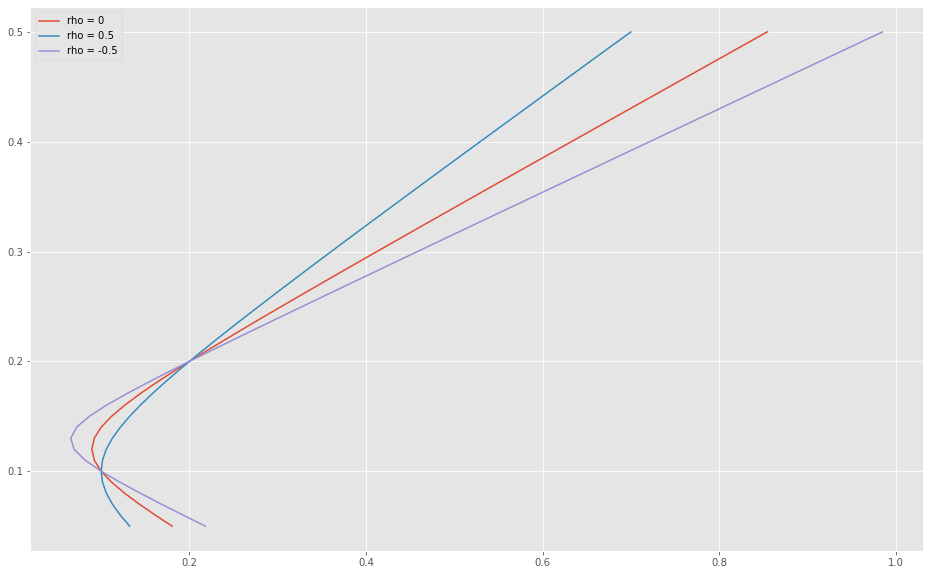

In [91]:
plt.plot(EF0['std'],mu_ps, label = 'rho = 0')
plt.plot(EFpos['std'],mu_ps, label = 'rho = 0.5')
plt.plot(EFneg['std'],mu_ps, label = 'rho = -0.5')
plt.legend()
plt.show

Try and go up and change the value of $\rho$ and see what happens

### 3.a Portfolios, diversification, efficient frontier.

The covariance matrix and the means were calculated previously

In [92]:
# Function to calculate the minimum variance given a mean
def minVarPort3(mu, Sigma, mu_p):
    n = len(mu)
    mu_1 = np.ones([n,2])
    mu_1[:,0] = mu
    A = np.transpose(mu_1) @ inv(Sigma) @ mu_1
    Ainv = inv(A)
    
    opt_weights = inv(Sigma)@ mu_1 @ Ainv @ np.array([[mu_p], [1]])
    opt_var = np.array([[mu_p, 1]]) @ Ainv @ np.array([[mu_p],[1]])
    
    return {"w1": opt_weights[0,0], "w2": opt_weights[1,0], "w3": opt_weights[2,0] ,"variance": opt_var[0,0], "mu": mu_p}

def calcEF(mu, Sigma):
    # Calculate the EF
    df_list = []
    mu_ps = np.arange(0.05, 0.51, 0.01)
    for mu_p in mu_ps:
        opt_port = minVarPort(mu, Sigma, mu_p)
        df_list.append(opt_port)
    df = pd.DataFrame(df_list).round(4)
    df['std'] = np.sqrt(df['variance'])
    return df

In [93]:
EF1 = calcEF(annual_mean,annual_cov)
EF1

,w1,w2,variance,mu,std
0,0.8580,0.5887,0.0956,0.05,0.309192
1,0.8257,0.5750,0.0865,0.06,0.294109
2,0.7934,0.5612,0.0782,0.07,0.279643
3,0.7611,0.5475,0.0705,0.08,0.265518
4,0.7288,0.5338,0.0636,0.09,0.252190
5,0.6965,0.5200,0.0573,0.10,0.239374
6,0.6642,0.5063,0.0518,0.11,0.227596
7,0.6319,0.4925,0.0469,0.12,0.216564
8,0.5996,0.4788,0.0428,0.13,0.206882
9,0.5673,0.4651,0.0393,0.14,0.198242


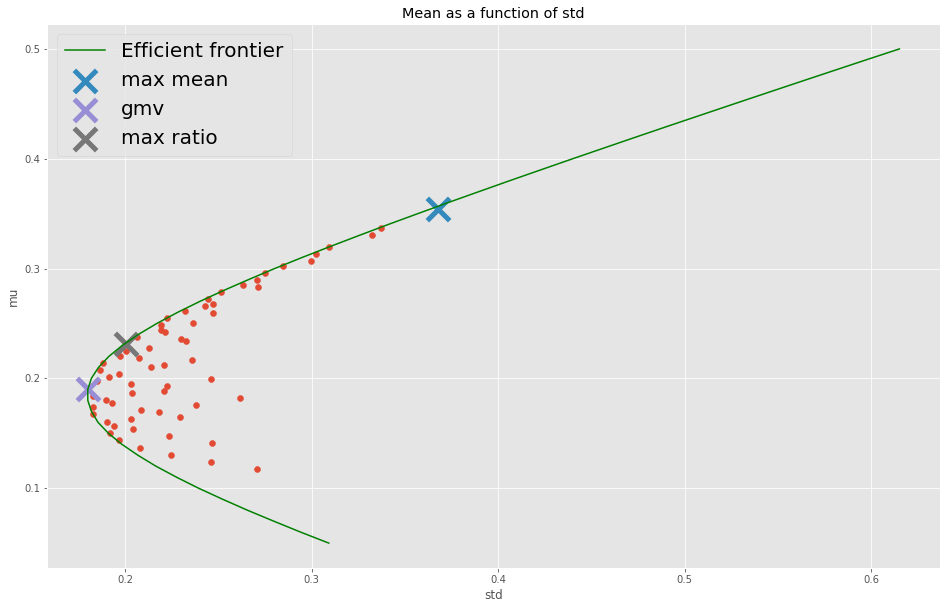

In [94]:
plt.scatter(port_std, port_mean, label="_nolegend_")
plt.plot(EF1['std'],EF1['mu'],color = "green")
plt.scatter(port_std[max_mean_idx], port_mean[max_mean_idx],s =500, marker = "x", linewidths =5)
plt.scatter(port_std[min_var_idx], port_mean[min_var_idx],s =500, marker = "x", linewidths =5)
plt.scatter(port_std[max_ratio_idx], port_mean[max_ratio_idx],s =500, marker = "x", linewidths =5)

plt.title("Mean as a function of std")
plt.ylabel('mu')
plt.xlabel('std')
plt.legend(list(("Efficient frontier","max mean", "gmv", "max ratio")), prop={'size': 20})
plt.show()